In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
#sklearn various libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [246]:
#Read in CSV file
diabet = pd.read_csv('diabetes_data.csv')
diabet.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [247]:
#Replace question marks with NaN
diabet = diabet.replace("?",np.nan)

In [248]:
len(diabet.select_dtypes('O').columns)
diabet['readmitted'].value_counts()/len(diabet)

readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: count, dtype: float64

In [249]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [250]:
diabet.isnull().sum()[diabet.isnull().sum()>1]/len(diabet)*100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
max_glu_serum        94.746772
A1Cresult            83.277322
dtype: float64

In [251]:
diabet.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)






# **Data Analysis and Viz**

In [252]:
 diabet['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

### **Readmitted**
Readmission is our target feature.
* If the patient was readmitted in less than 30 days **"<30"**
* if the patient was readmitted in more than 30 days **">30"**
* If there is no record **"NO"**

These will be mapped as:
* NO -> 0 <30 
*  >30 -> 1

In [253]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


readmitted
0    90409
1    11357
Name: count, dtype: int64


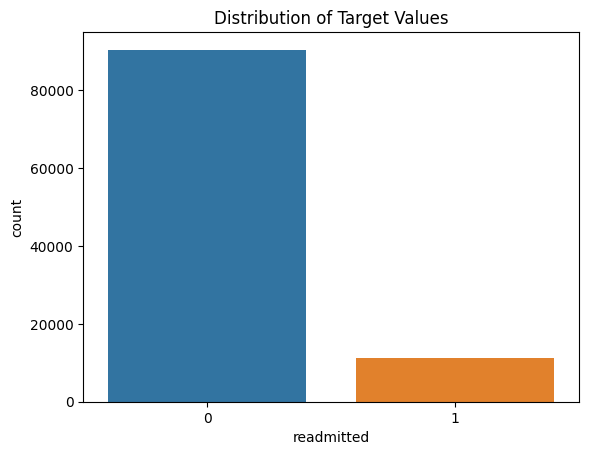

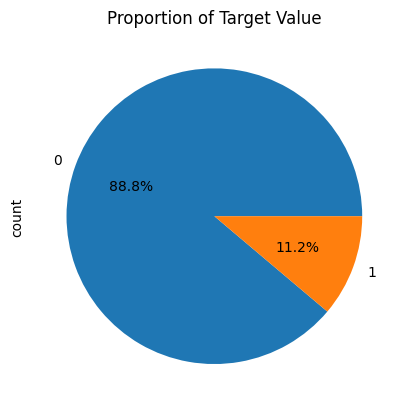

In [254]:
diabet = diabet.replace({"NO":0,
                         "<30":1,
                         ">30":0})

print(diabet.readmitted.value_counts())

sns.countplot(x = "readmitted", data = diabet)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
diabet.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

### **Race**

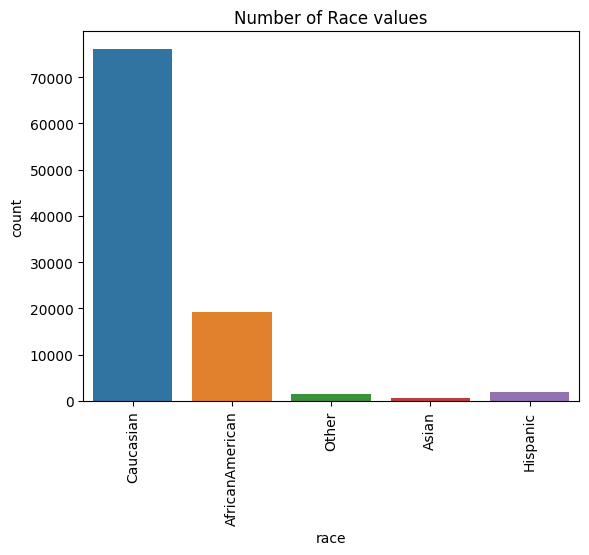

Proportion of Race
race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: proportion, dtype: float64


In [255]:
sns.countplot(x=diabet.race, data = diabet)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(diabet.race.value_counts(normalize = True)*100)

-**Caucasians** account for 76% of patient data. The remaining includes **African Americans**, **Hispanics**, **Asians** and **Others**.<br>
- We will class race into three major groups: **Caucasian**, **African American** and **Other**.

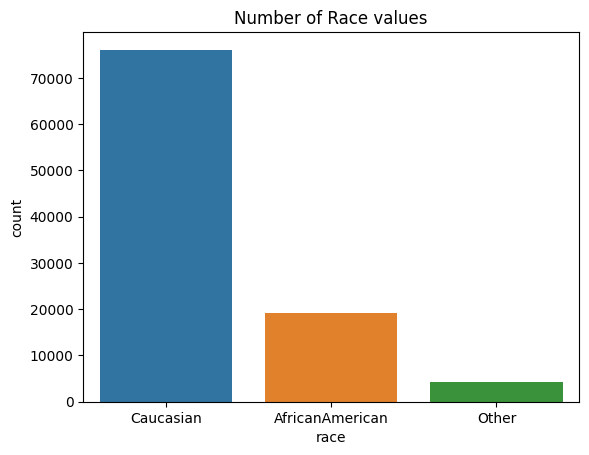

Proportion of Race After the Mapping
race
Caucasian          76.486788
AfricanAmerican    19.307891
Other               4.205321
Name: proportion, dtype: float64


In [256]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
diabet.race = diabet.race.replace(mapped_race)

sns.countplot(x="race", data = diabet)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race After the Mapping")
print(diabet.race.value_counts(normalize= True)*100)

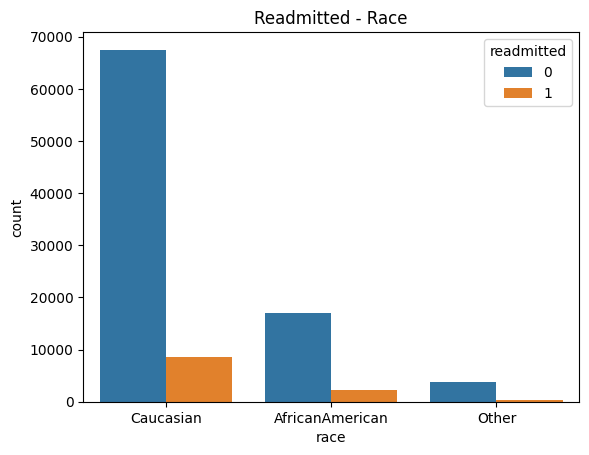

In [257]:
sns.countplot(x="race", hue= "readmitted", data = diabet)
plt.title("Readmitted - Race")
plt.show()

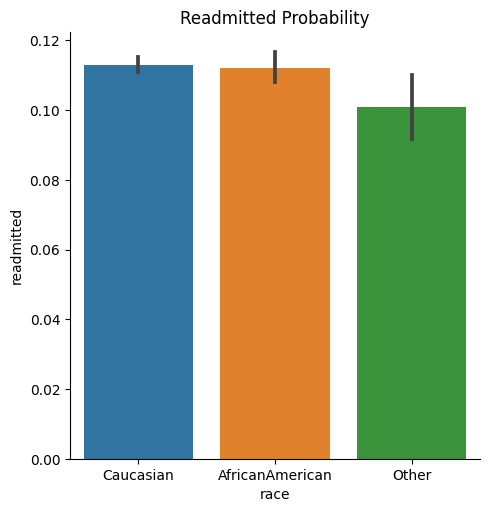

In [258]:
sns.catplot(x = "race", y = "readmitted",
            data = diabet, kind = "bar", height= 5)
plt.title("Readmitted Probability")
plt.show()

- Most of the patients are **Caucasian**, followed by **African Americans**.
- We see similar readmission rates for Caucasians and African Americans, with a slightly lower rate for other races (noting this is a smaller group overall)

### **Gender**

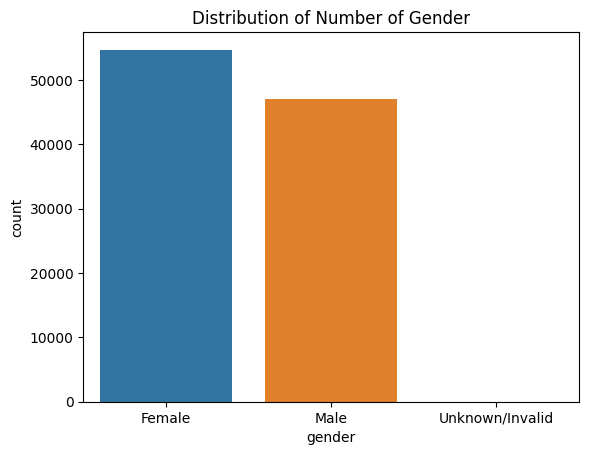

Proportions of Race Value
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64


In [259]:
sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(diabet.gender.value_counts(normalize = True))

- Please note: there was only one entry for **Unknown/Invalid**, therefore this was dropped.

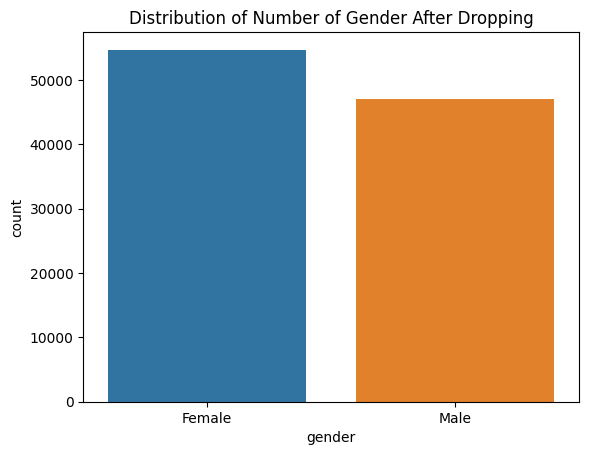

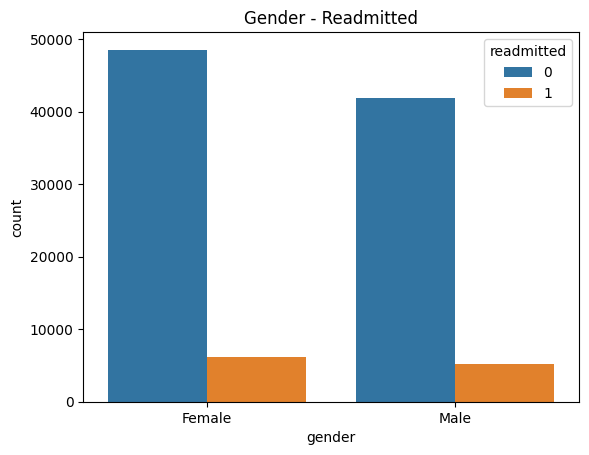

In [260]:
diabet = diabet.drop(diabet.loc[diabet["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = diabet)
plt.title("Gender - Readmitted")
plt.show()

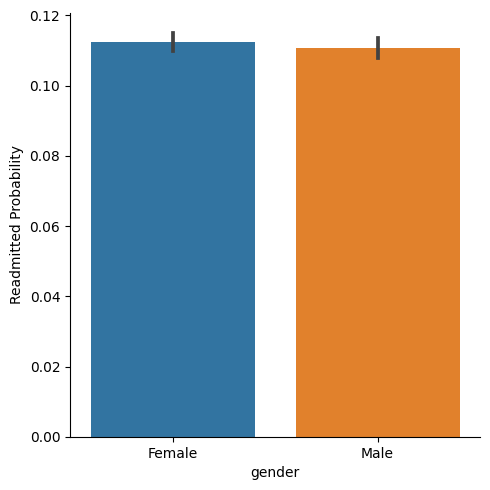

In [261]:
g = sns.catplot(x = "gender",y = "readmitted", 
                data = diabet, kind = "bar", height= 5)
g.set_ylabels("Readmitted Probability")
plt.show()

- We see a nearly equal distribution of **Gender**, with females showing a slightly higher probability of readmission.

## **Age**

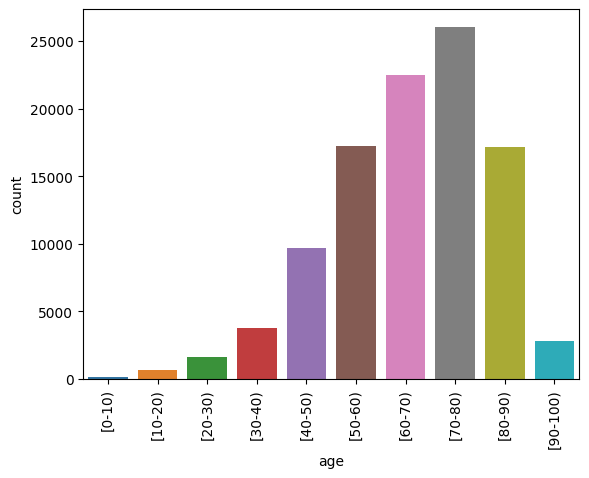

In [262]:
sns.countplot(x="age", data = diabet)
plt.xticks(rotation = 90)
plt.show()

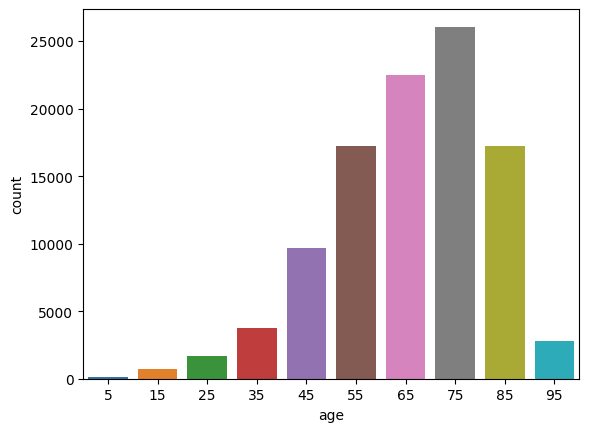

In [263]:
diabet.age = diabet.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = diabet)
#plt.xticks(rotation = 90)
plt.show()

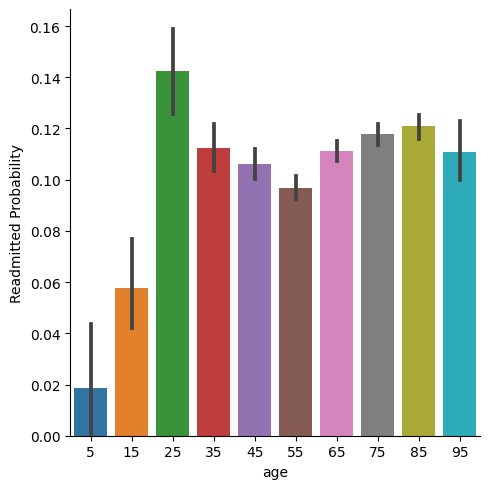

In [264]:
g = sns.catplot(x = "age", y = "readmitted", data = diabet, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()

### **Admission Type ID**
Classifications:
- **Emergency**        : 1
- **Urgent**           : 2
- **Elective**         : 3
- **Newborn**          : 4
- **Not Available**    : 5
- **NULL**             : 6
- **Trauma Center**    : 7
- **Not Mapped**       : 8



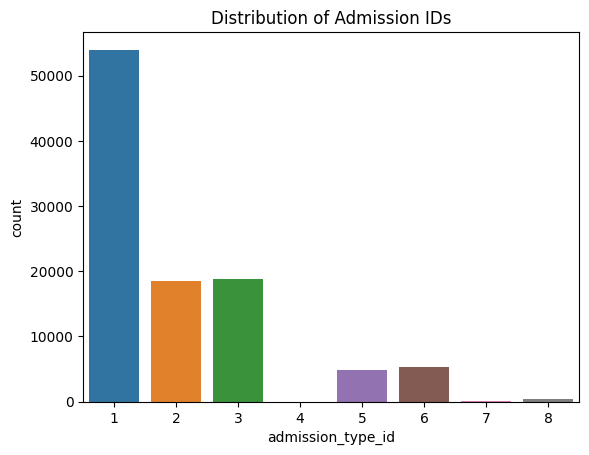

Distribution of ID's
admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64


In [265]:
sns.countplot(x = "admission_type_id", data = diabet)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(diabet.admission_type_id.value_counts())

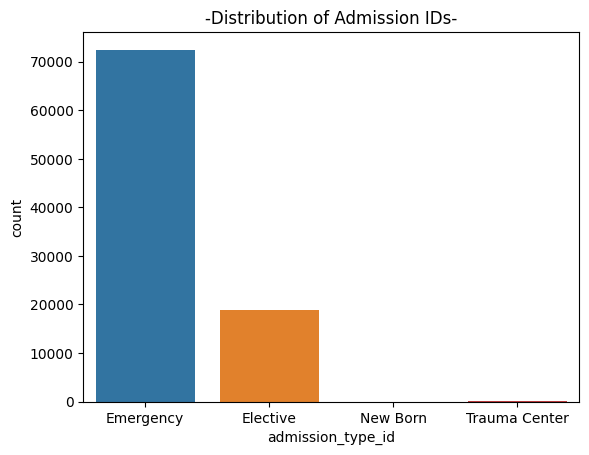

-Distribution of ID's-
admission_type_id
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: count, dtype: int64


In [266]:
# re-classifying to simplify 
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

diabet.admission_type_id = diabet.admission_type_id.replace(mapped)

sns.countplot(x = "admission_type_id", data = diabet)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of ID's-")
print(diabet.admission_type_id.value_counts())

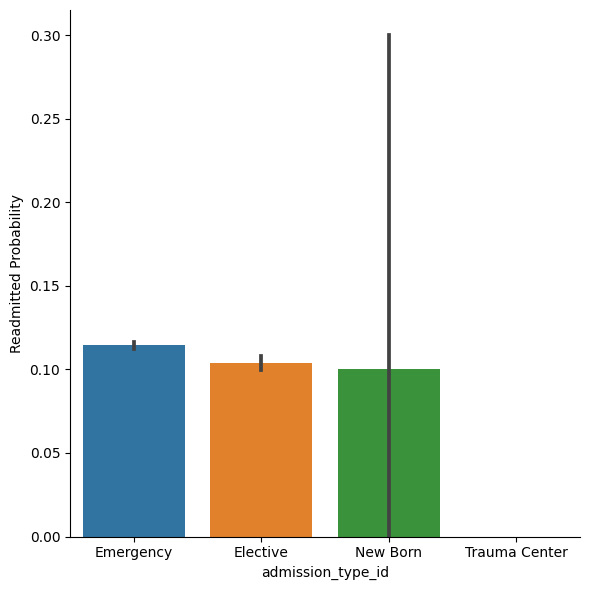

In [267]:
g = sns.catplot(x = "admission_type_id", y ="readmitted", 
                    data = diabet, height = 6, kind = "bar")
g.set_ylabels("Readmitted Probability")
plt.show()

### **Discharge Disposition ID**
-Location discharged to. This will be simplified for the purpose of our analysis

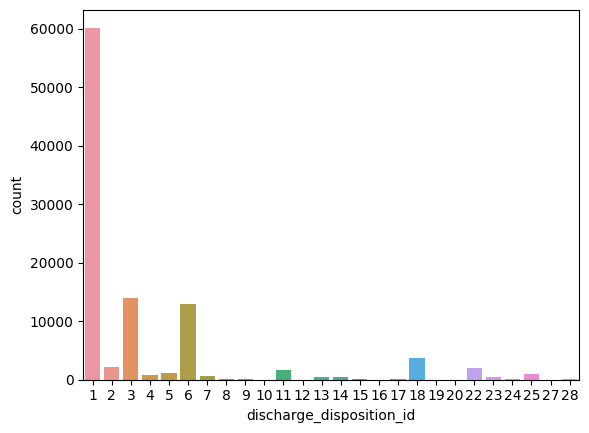

In [268]:
sns.countplot(x ="discharge_disposition_id", data = diabet)
plt.show()

In [269]:
diabet['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [270]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

diabet["discharge_disposition_id"] = diabet["discharge_disposition_id"].replace(mapped_discharge)

In [271]:
diabet['discharge_disposition_id'].unique()

array([nan, 'Discharged to Home', 'Other'], dtype=object)

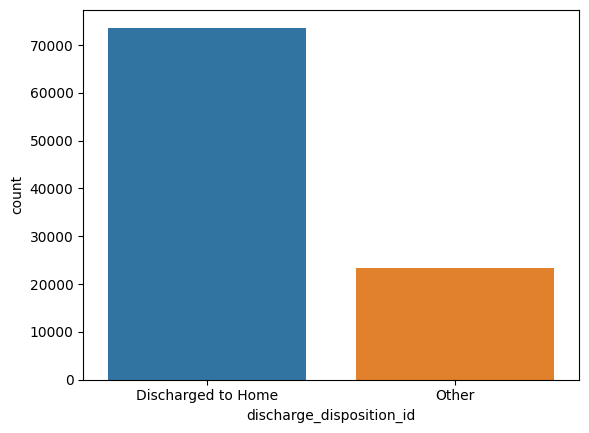

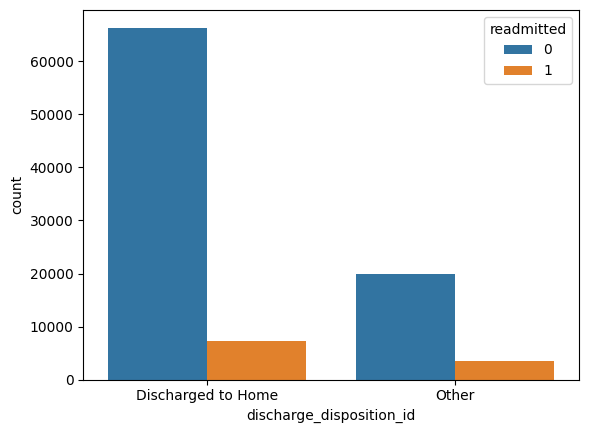

Proportions of ID's
discharge_disposition_id
Discharged to Home    73649
Other                 23434
Name: count, dtype: int64


In [272]:
sns.countplot(x ="discharge_disposition_id", data = diabet)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = diabet)
plt.show()

print("Proportions of ID's")
print(diabet.discharge_disposition_id.value_counts())

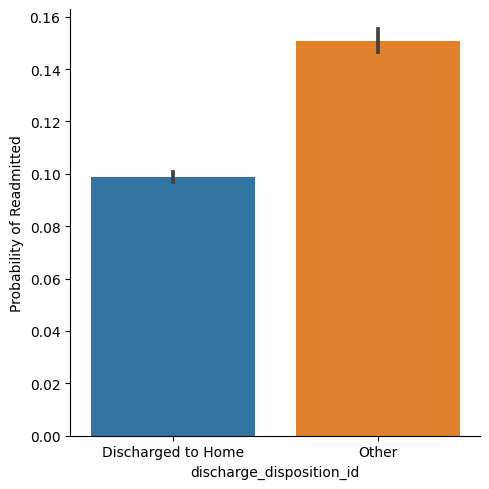

In [273]:
g = sns.catplot(x = "discharge_disposition_id", y="readmitted", 
                data = diabet, height = 5, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

### **Admission Source ID**

E.g.  **physician referral, emergency room, transfer from hospital**. These will also be re-classified for simplicity.


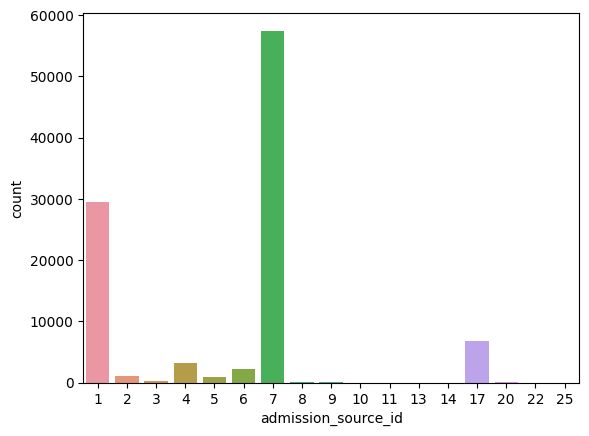

In [274]:
sns.countplot(x ="admission_source_id", data = diabet)
plt.show()

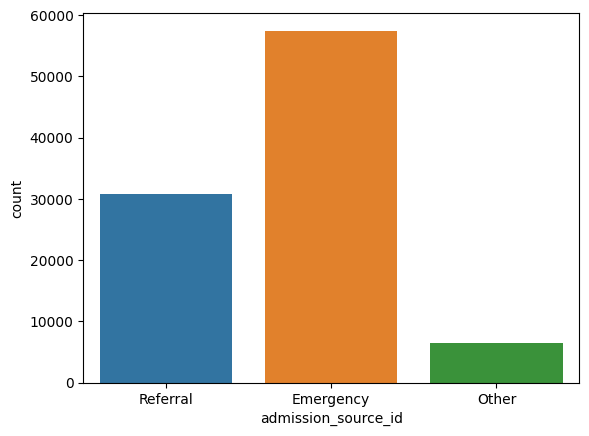

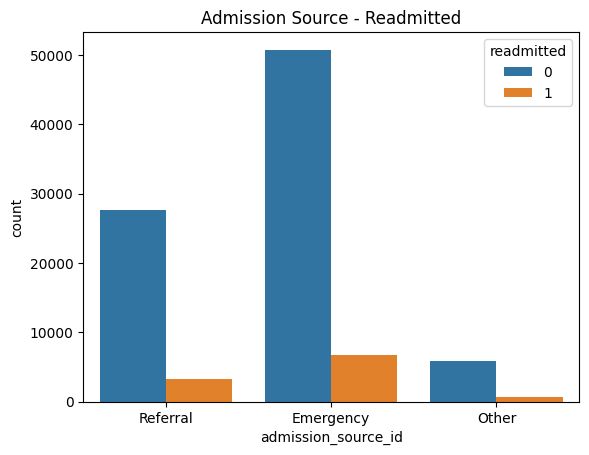

admission_source_id
Emergency    57492
Referral     30855
Other         6474
Name: count, dtype: int64


In [275]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
diabet.admission_source_id = diabet.admission_source_id.replace(mapped_adm)

sns.countplot(x = "admission_source_id", data = diabet)
plt.show()

sns.countplot(x = "admission_source_id", hue = "readmitted", data = diabet)
plt.title("Admission Source - Readmitted")
plt.show()


print(diabet.admission_source_id.value_counts())

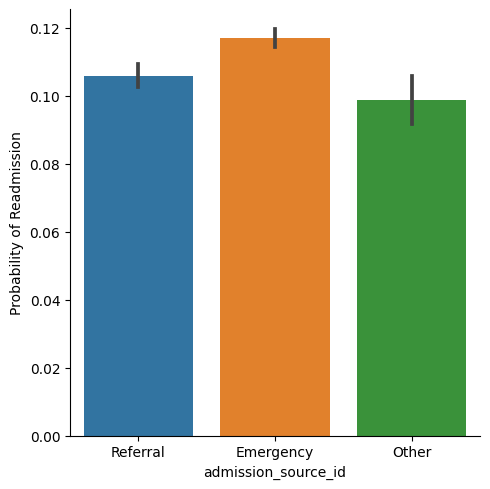

In [276]:
g = sns.catplot(x = "admission_source_id", y ="readmitted", 
                    data = diabet, kind = "bar", height= 5)
g.set_ylabels("Probability of Readmission")
plt.show()

Emergency has the greatest number of patients present, and also the greatest probability of readmission (as expected)


## **Time in Hospital**
Number of days between admission and discharge.

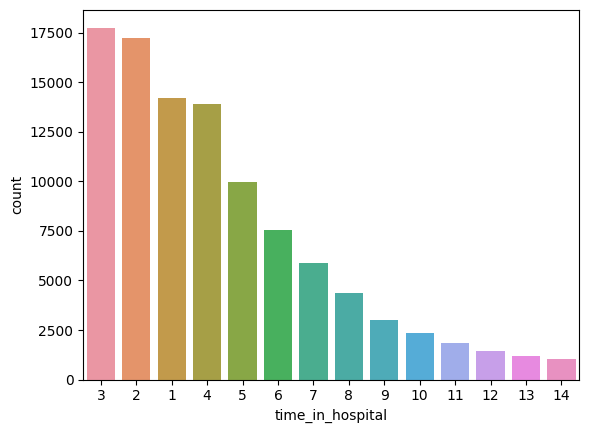

time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64


In [277]:
sns.countplot(x="time_in_hospital", data = diabet,
              order = diabet.time_in_hospital.value_counts().index)
plt.show()

print(diabet.time_in_hospital.value_counts())


/var/folders/q5/vrbfjzv17pvctgw4rzsxjsn40000gn/T/ipykernel_64541/2458101527.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "time_in_hospital"],
/var/folders/q5/vrbfjzv17pvctgw4rzsxjsn40000gn/T/ipykernel_64541/2458101527.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "time_in_hospital"],


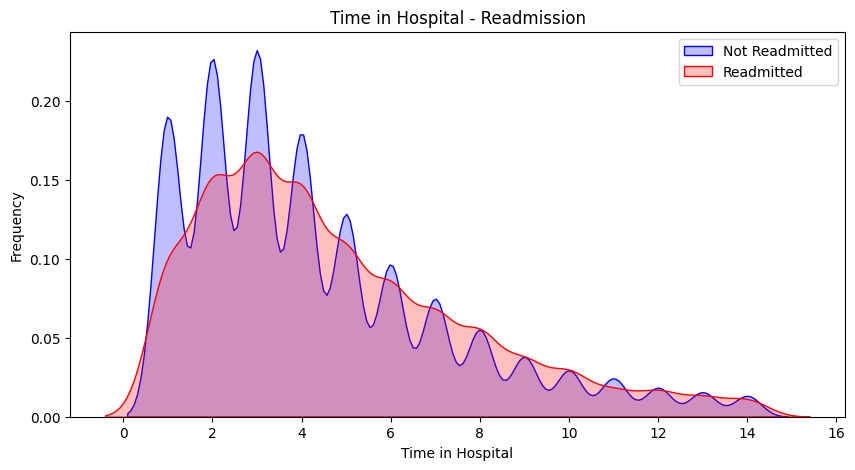

In [278]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "time_in_hospital"],
                 color = "b", shade = True, label = "Not Readmitted")

ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "time_in_hospital"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("Time in Hospital")
ax.set_ylabel("Frequency")
ax.set_title("Time in Hospital - Readmission")
plt.show()

Majority of patients experienced a 2-3 day visit. There is greater variance in patients who were not re-admitted when compared to those who were readmitted. This may indicate that readmitted patients are more predictable in their presentation. 


### **Number of Lab Procedures**

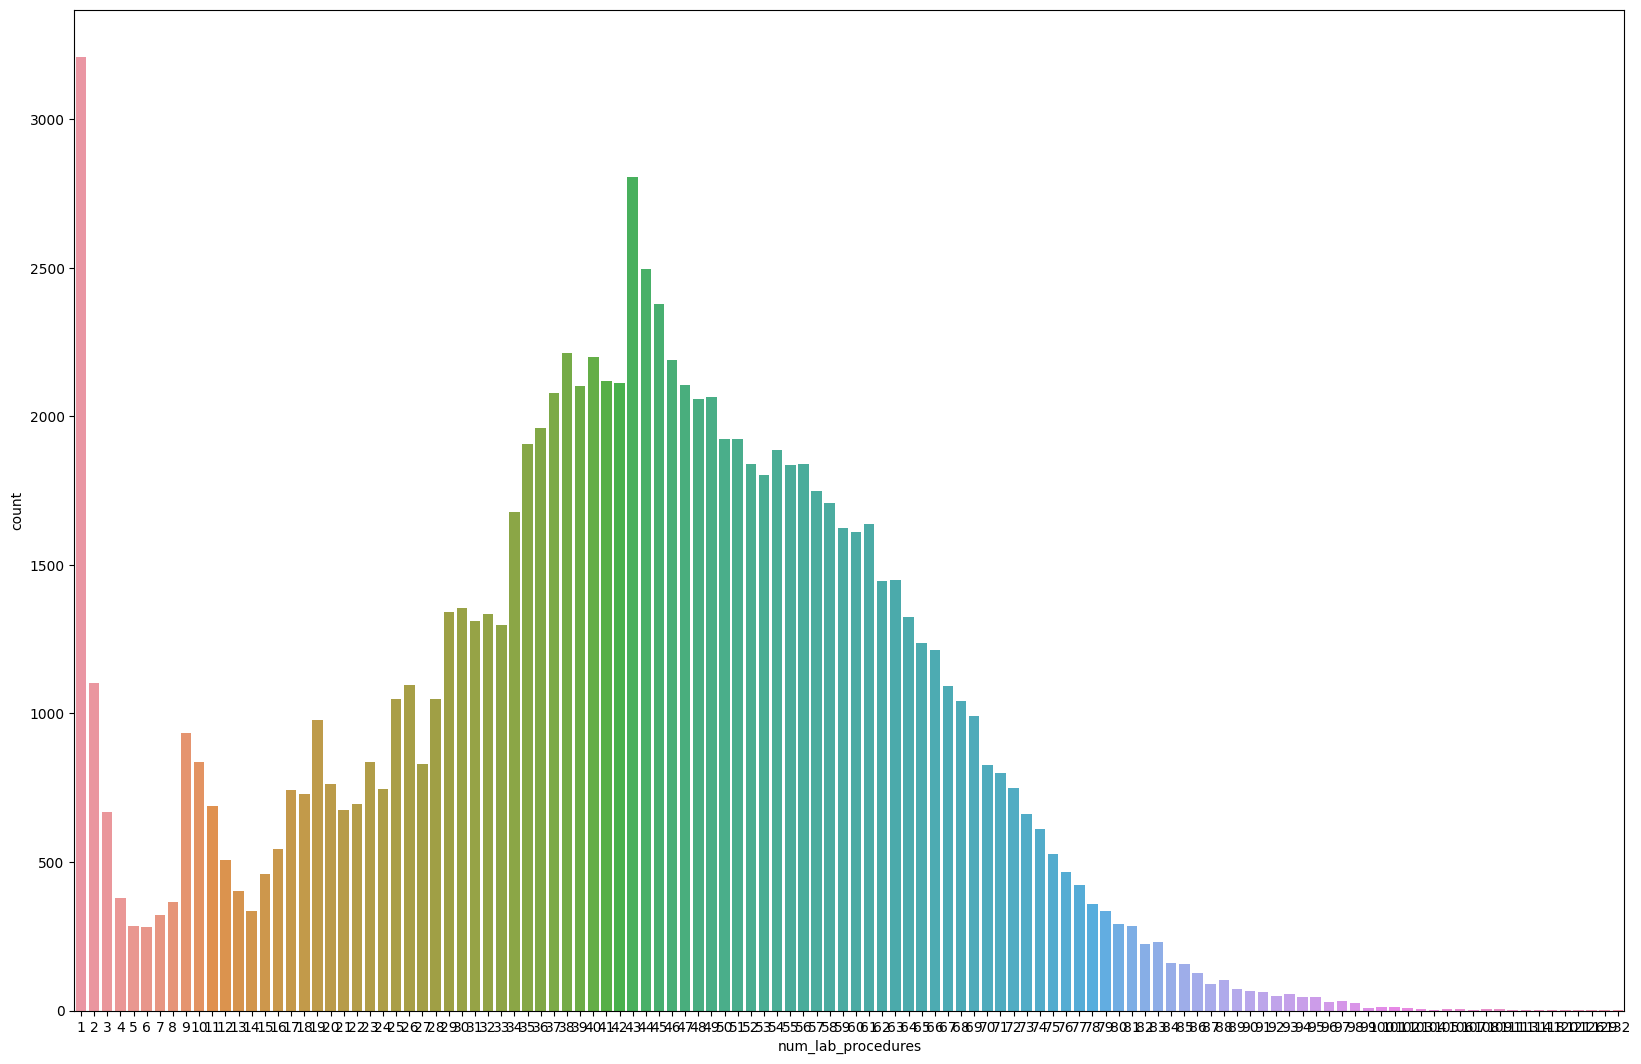

Proportions of Column
num_lab_procedures
1     3208
43    2804
44    2496
45    2376
38    2212
40    2201
46    2189
41    2117
42    2113
47    2106
Name: count, dtype: int64


In [279]:
plt.figure(figsize=(20,13))
sns.countplot(x = "num_lab_procedures", data = diabet)
plt.show()

print("Proportions of Column")
print(diabet.num_lab_procedures.value_counts().head(10))

/var/folders/q5/vrbfjzv17pvctgw4rzsxjsn40000gn/T/ipykernel_64541/1338322189.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "num_lab_procedures"],
/var/folders/q5/vrbfjzv17pvctgw4rzsxjsn40000gn/T/ipykernel_64541/1338322189.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "num_lab_procedures"],


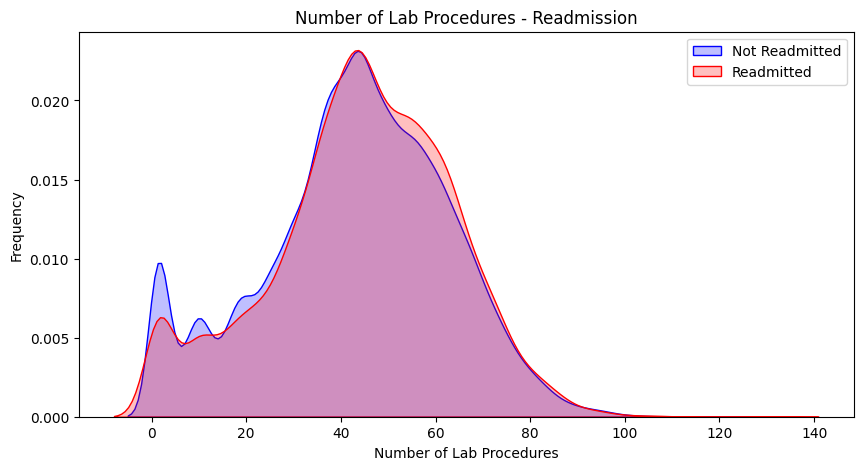

In [280]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "num_lab_procedures"],
                 color = "b", shade = True,label = "Not Readmitted")

#readmitted = 1
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "num_lab_procedures"],
                 color = "r", shade = True, label = "Readmitted")

ax.legend(loc="upper right")

ax.set_xlabel("Number of Lab Procedures")
ax.set_ylabel("Frequency")
ax.set_title("Number of Lab Procedures - Readmission")

plt.show()

### **Number of Procedures**
(other than lab tests)

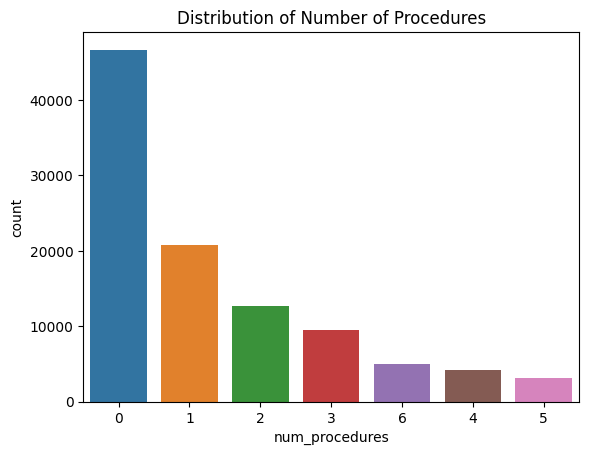

Proportions of Values
num_procedures
0    45.843774
1    20.381671
2    12.495701
3     9.279404
6     4.868174
4     4.107583
5     3.023692
Name: proportion, dtype: float64


In [281]:
sns.countplot(x = diabet.num_procedures, order = diabet.num_procedures.value_counts().index)
plt.title("Distribution of Number of Procedures")
plt.show()

print("Proportions of Values")
print(diabet.num_procedures.value_counts(normalize=True)*100)


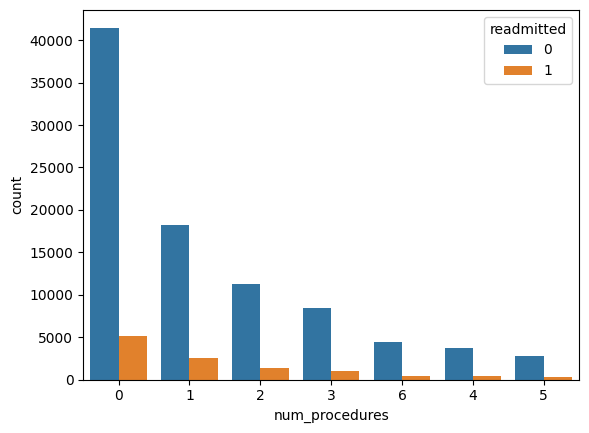

In [282]:
sns.countplot(x = "num_procedures", hue = "readmitted", 
              data = diabet, order = diabet.num_procedures.value_counts().index)
plt.show()

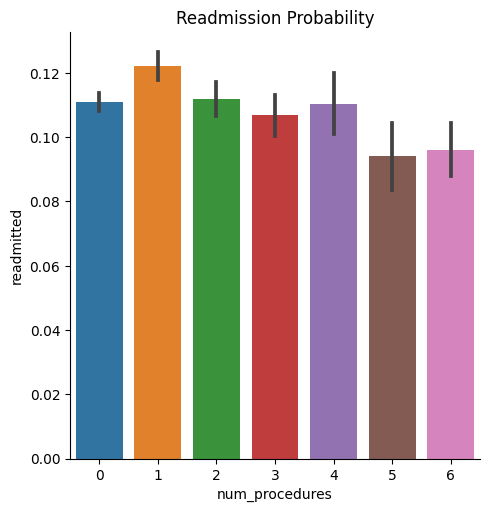

In [283]:
sns.catplot(x = "num_procedures", y = "readmitted",
               data = diabet, kind = "bar", height = 5)
plt.title("Readmission Probability")
plt.show()

## **Number of Medications**
Number of distinct generic names administered during the encounter

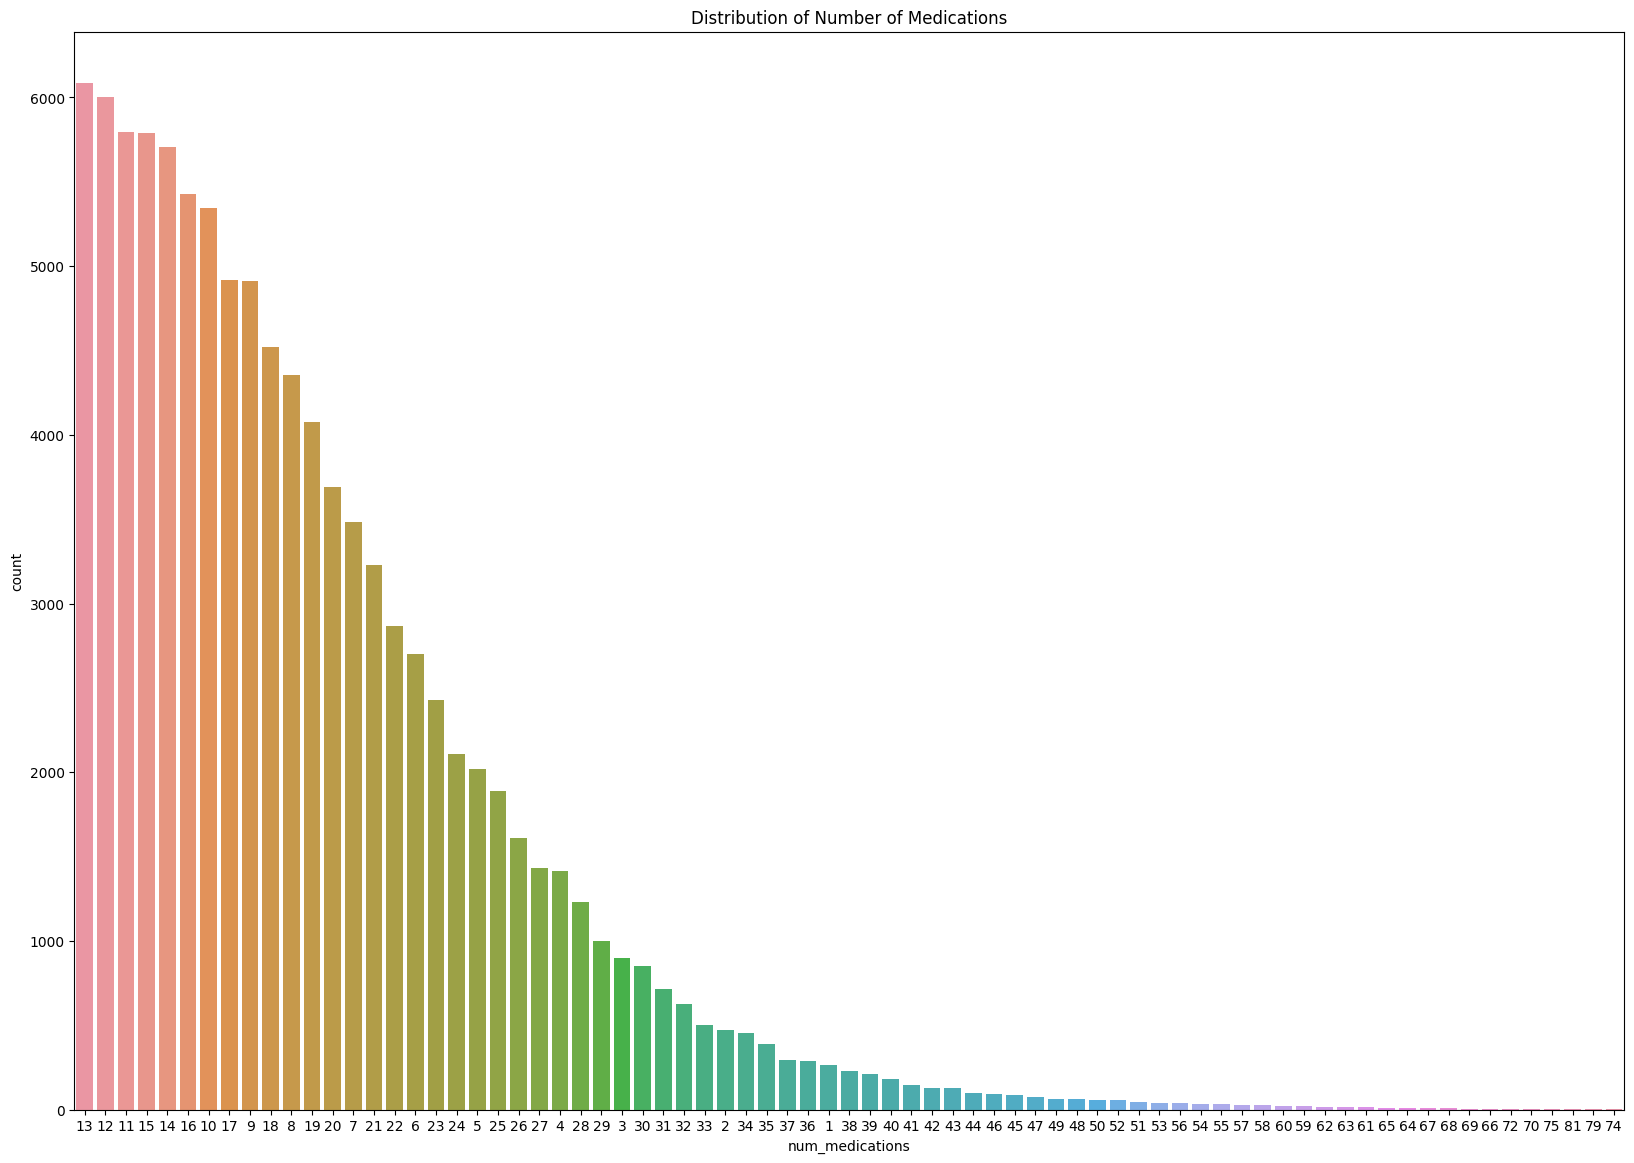

num_medications
13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64


In [284]:
plt.figure(figsize=(20,14))
sns.countplot(x="num_medications", data = diabet, 
        order = diabet.num_medications.value_counts().index)
plt.title("Distribution of Number of Medications")
plt.show()

print(diabet.num_medications.value_counts())

### **Diag1, Diag2 and Diag3**

In [285]:
#Requires mapping
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [286]:
diabet = map_diagnosis(diabet,["diag_1","diag_2","diag_3"])

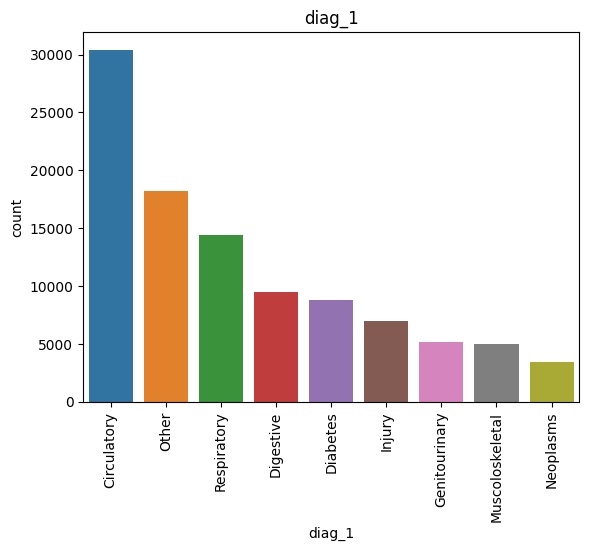

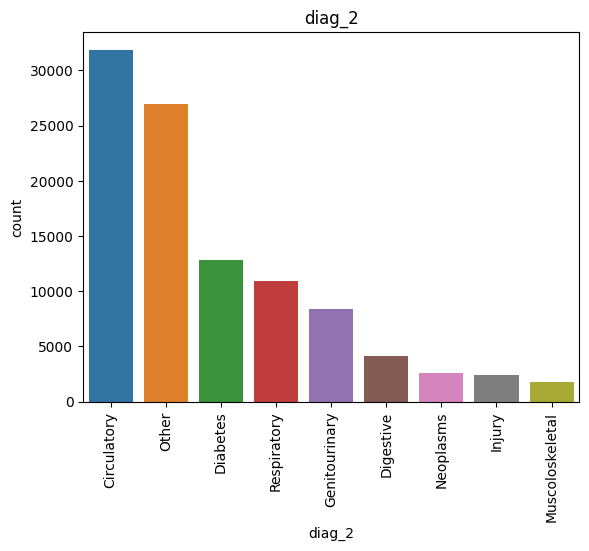

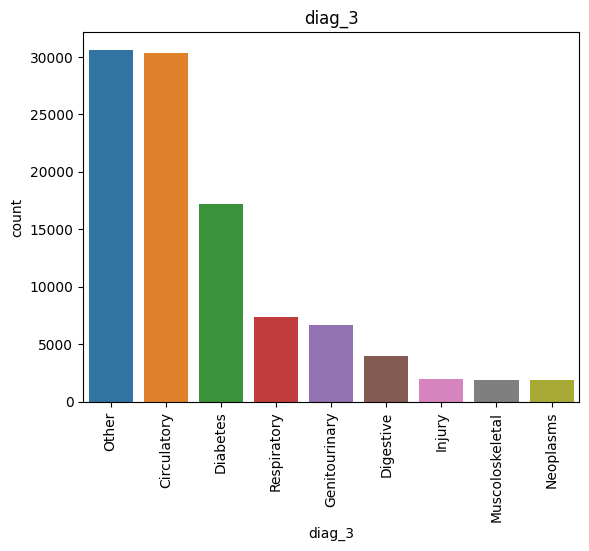

In [287]:
def plot_diags(col,data):
    sns.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

diag_cols = ["diag_1","diag_2","diag_3"]

for diag in diag_cols:
    plot_diags(diag,diabet)


## **Diabetes medications**
Please note: given the large number of medications available, these werent directly analysed. Please see the 'change' section below to review if a change in medication supported readmission predictions. 

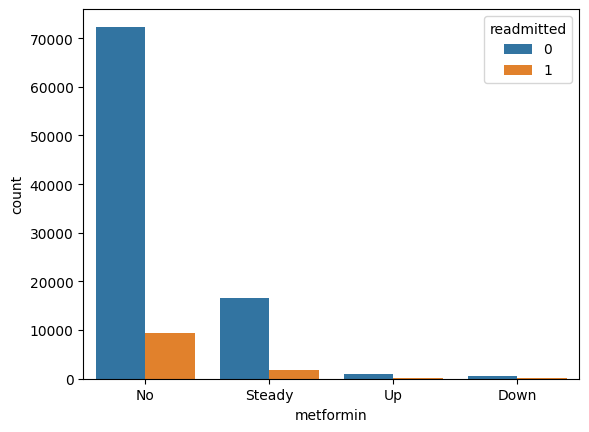

METFORMIN
metformin
No        81776
Steady    18345
Up         1067
Down        575
Name: count, dtype: int64


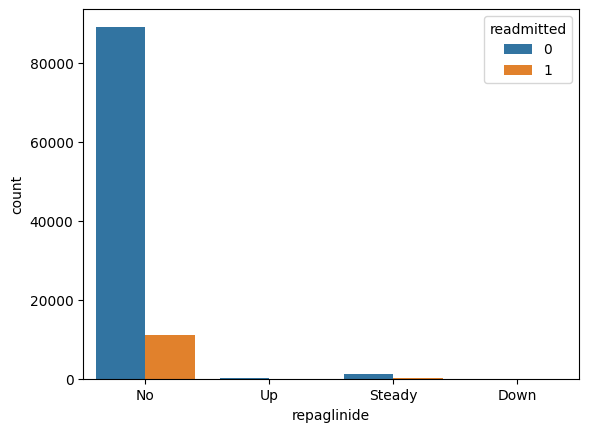

REPAGLINIDE
repaglinide
No        100224
Steady      1384
Up           110
Down          45
Name: count, dtype: int64


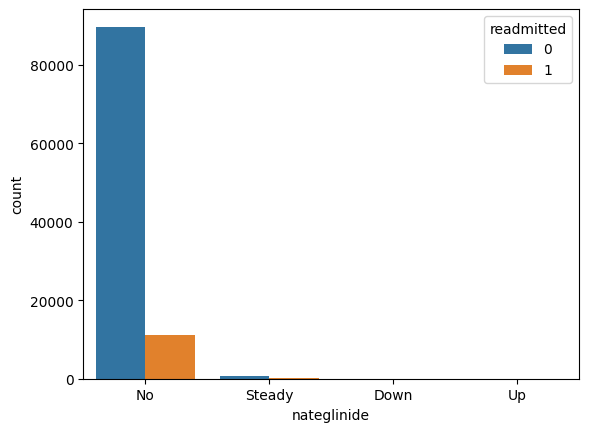

NATEGLINIDE
nateglinide
No        101060
Steady       668
Up            24
Down          11
Name: count, dtype: int64


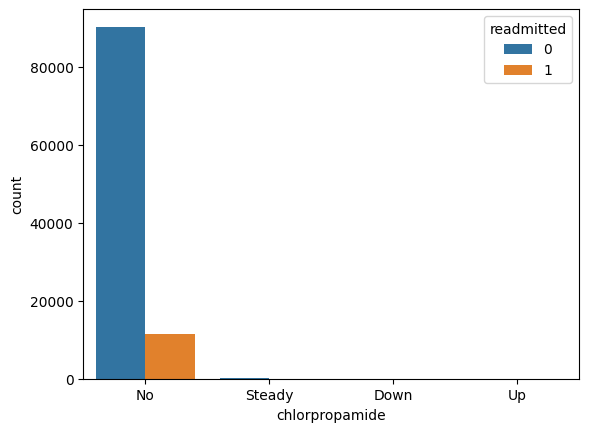

CHLORPROPAMIDE
chlorpropamide
No        101677
Steady        79
Up             6
Down           1
Name: count, dtype: int64


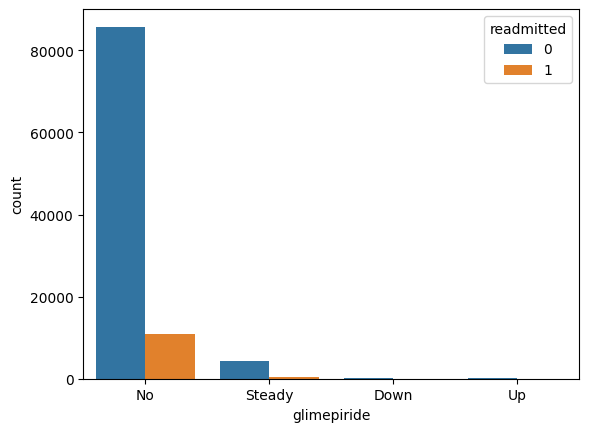

GLIMEPIRIDE
glimepiride
No        96572
Steady     4670
Up          327
Down        194
Name: count, dtype: int64


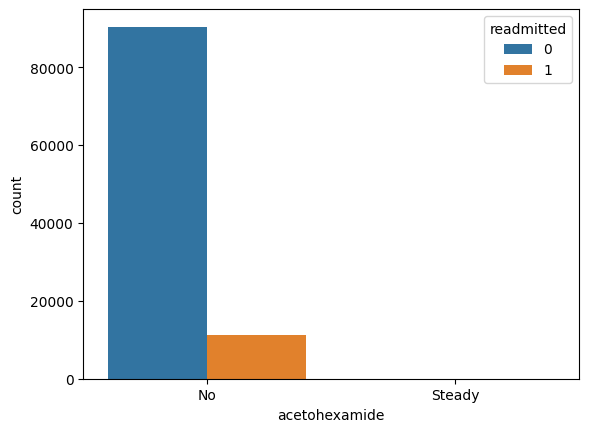

ACETOHEXAMIDE
acetohexamide
No        101762
Steady         1
Name: count, dtype: int64


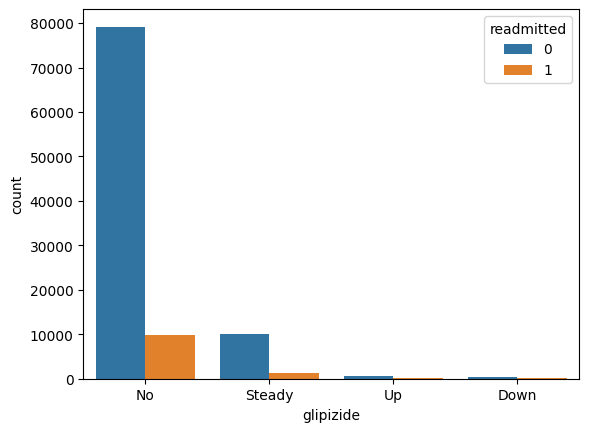

GLIPIZIDE
glipizide
No        89078
Steady    11355
Up          770
Down        560
Name: count, dtype: int64


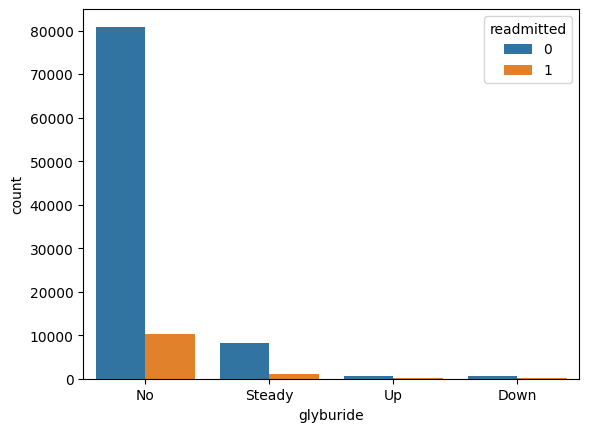

GLYBURIDE
glyburide
No        91113
Steady     9274
Up          812
Down        564
Name: count, dtype: int64


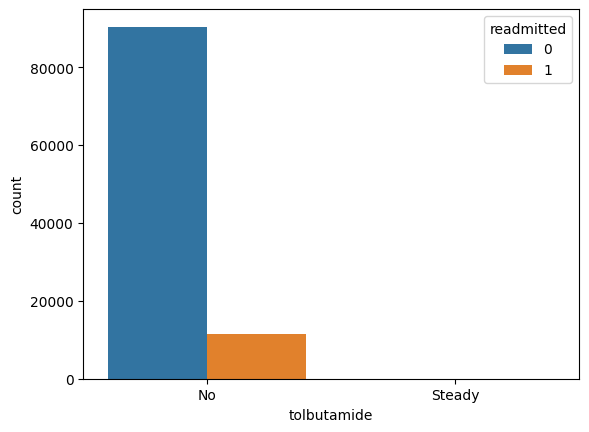

TOLBUTAMIDE
tolbutamide
No        101740
Steady        23
Name: count, dtype: int64


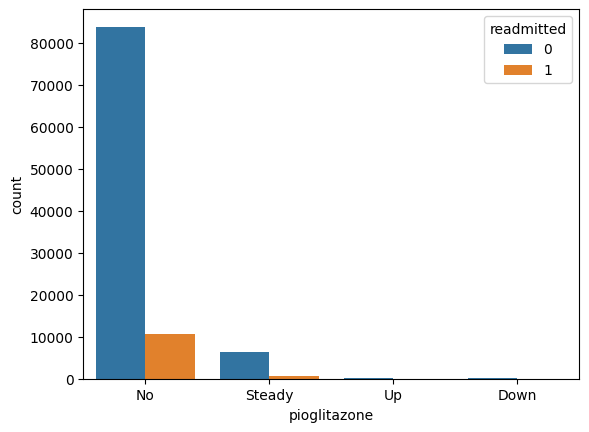

PIOGLITAZONE
pioglitazone
No        94436
Steady     6975
Up          234
Down        118
Name: count, dtype: int64


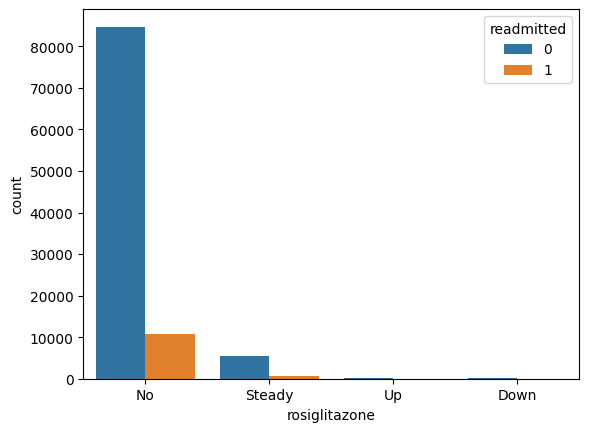

ROSIGLITAZONE
rosiglitazone
No        95399
Steady     6099
Up          178
Down         87
Name: count, dtype: int64


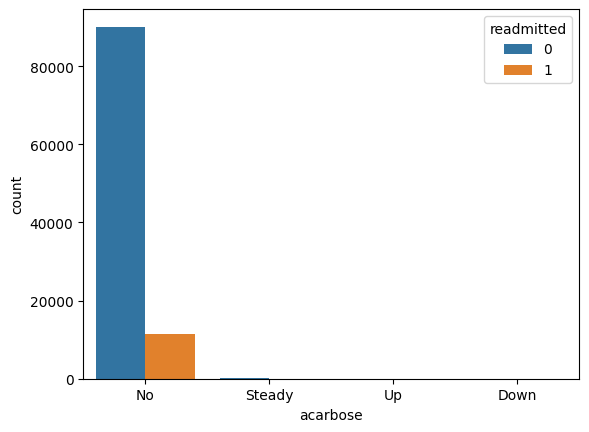

ACARBOSE
acarbose
No        101455
Steady       295
Up            10
Down           3
Name: count, dtype: int64


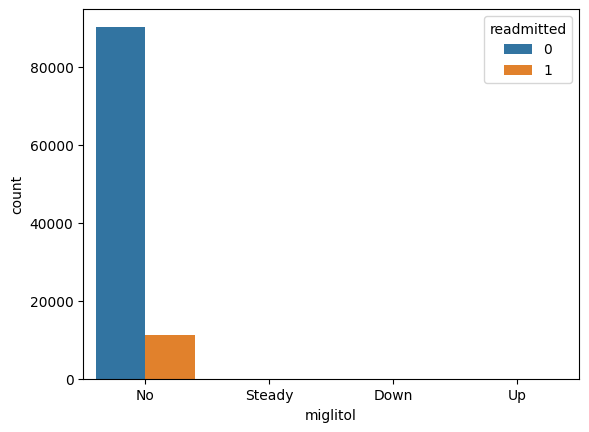

MIGLITOL
miglitol
No        101725
Steady        31
Down           5
Up             2
Name: count, dtype: int64


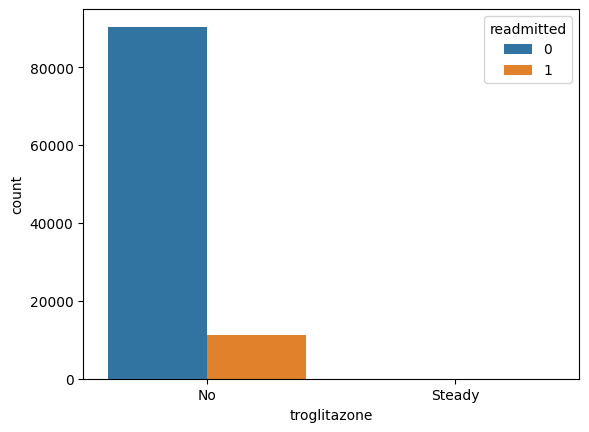

TROGLITAZONE
troglitazone
No        101760
Steady         3
Name: count, dtype: int64


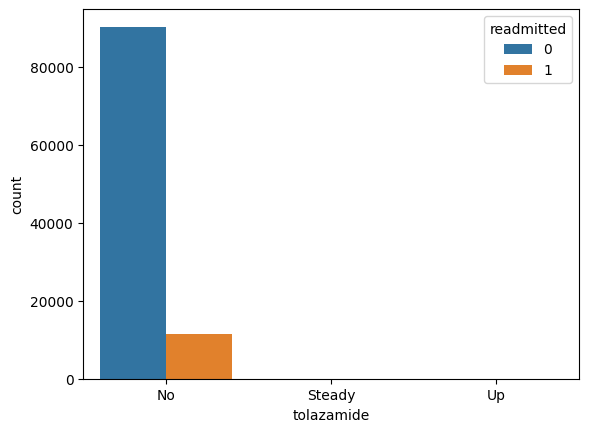

TOLAZAMIDE
tolazamide
No        101724
Steady        38
Up             1
Name: count, dtype: int64


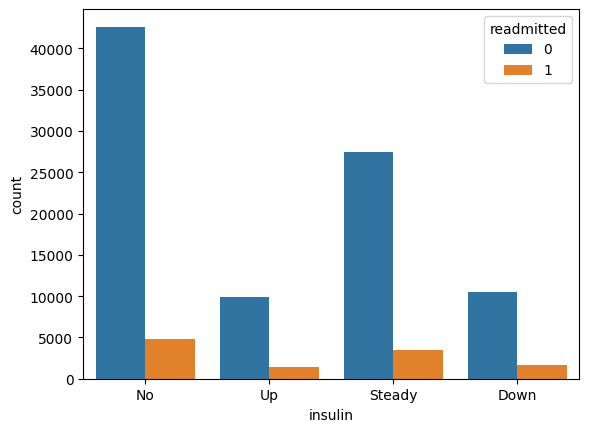

INSULIN
insulin
No        47380
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64


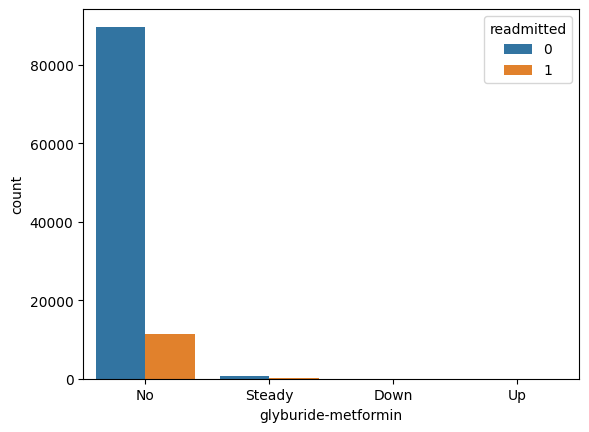

GLYBURIDE-METFORMIN
glyburide-metformin
No        101057
Steady       692
Up             8
Down           6
Name: count, dtype: int64


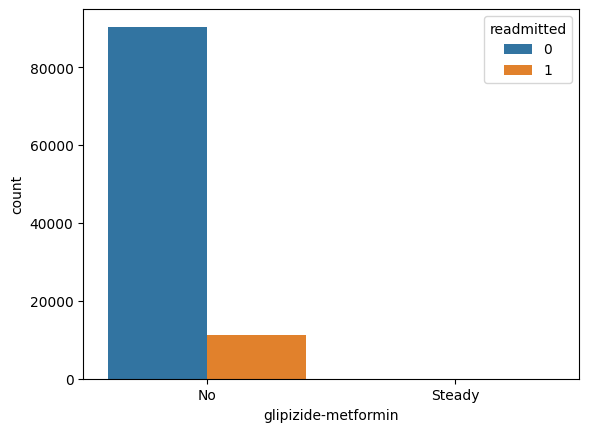

GLIPIZIDE-METFORMIN
glipizide-metformin
No        101750
Steady        13
Name: count, dtype: int64


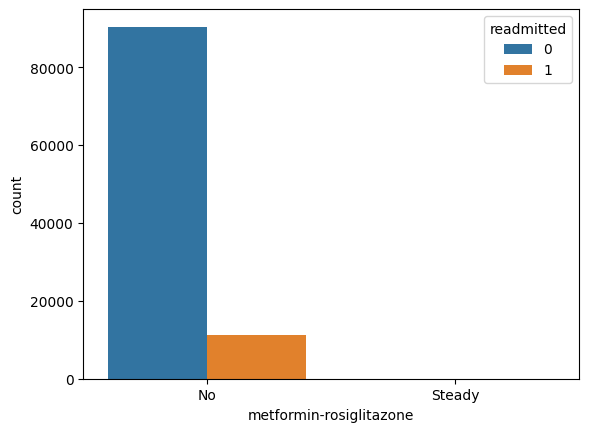

METFORMIN-ROSIGLITAZONE
metformin-rosiglitazone
No        101761
Steady         2
Name: count, dtype: int64


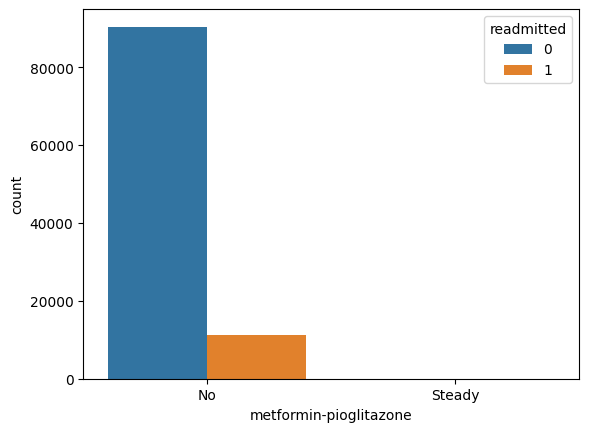

METFORMIN-PIOGLITAZONE
metformin-pioglitazone
No        101762
Steady         1
Name: count, dtype: int64


In [288]:
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

def explore_drug(drugs):

  for drug in drugs:
    sns.countplot(x = drug, 
                  hue = "readmitted",
                  data = diabet)
    plt.show()
    print(drug.upper())
    print(diabet[f"{drug}"].value_counts())
    

explore_drug(drug_cols)

## **Change**
Indicates if there was a change in diabetic medications. Values were either: 
- **“change”** 
- **“no change”**

In [289]:
diabet.change.value_counts()

change
No    54754
Ch    47009
Name: count, dtype: int64

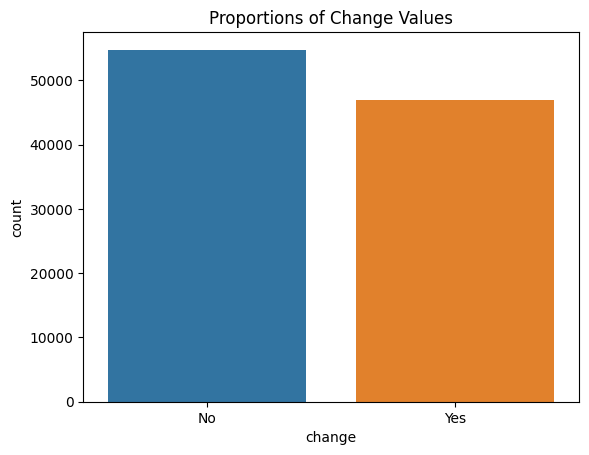

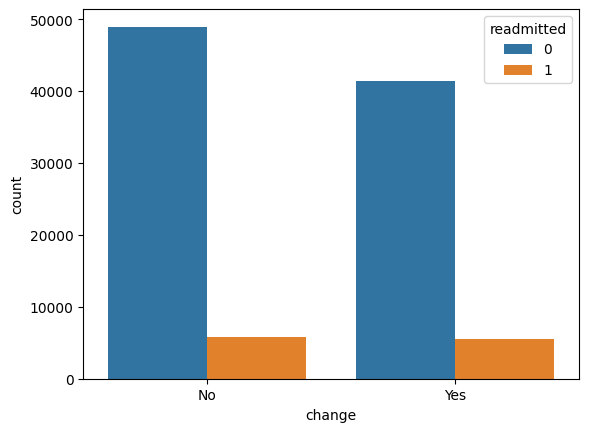

In [290]:
diabet.change = diabet.change.replace("Ch","Yes")

sns.countplot(x = "change", data = diabet)
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "change", hue = "readmitted", data = diabet)
plt.show()


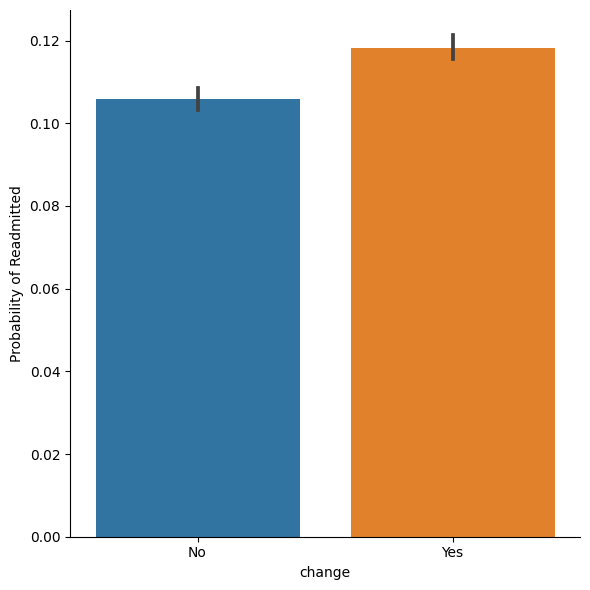

In [291]:
g = sns.catplot(x = "change", y="readmitted", data = diabet, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()                                                                                

## **Glucose Serum Test Result**<br>
Indicates the range of the result or if the test was not taken.<br> 
Values: 
- “>200,” 
- “>300,”
- “normal,” 
- “none” if not measured<br>

Reclassifying into normal or not normal (1 or 2)


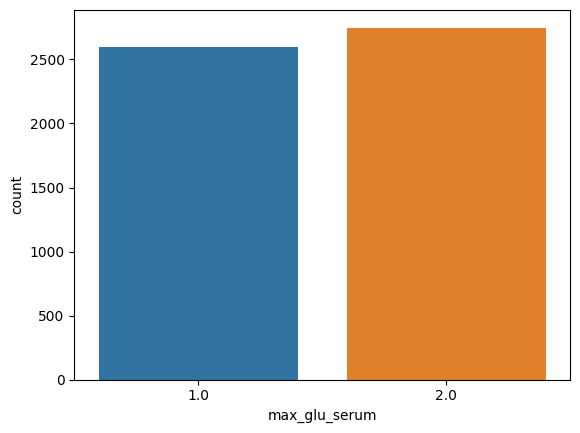

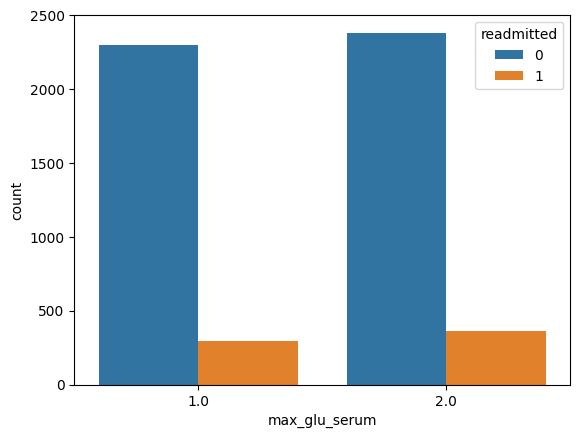

max_glu_serum
2.0    2749
1.0    2597
Name: count, dtype: int64


In [292]:
diabet["max_glu_serum"] = diabet["max_glu_serum"].replace({">200":2,
                                                        ">300":2,
                                                        "Norm":1,
                                                        "None":0}) 

sns.countplot(x = "max_glu_serum", data = diabet)
plt.show()

sns.countplot(x = "max_glu_serum",hue = "readmitted", data = diabet)
plt.show()

print(diabet.max_glu_serum.value_counts())

## **A1c test result**

Indicates the range of the result or if the test was not taken. <br>
Values: 
- “>8” if the result
was greater than 8%, 
- “>7” if the result was greater than 7% but less than 8%, “normal”
- if the result was less than 7%, and “none” if not measured.

Reclassifying into normal and not normal (1 or 2)

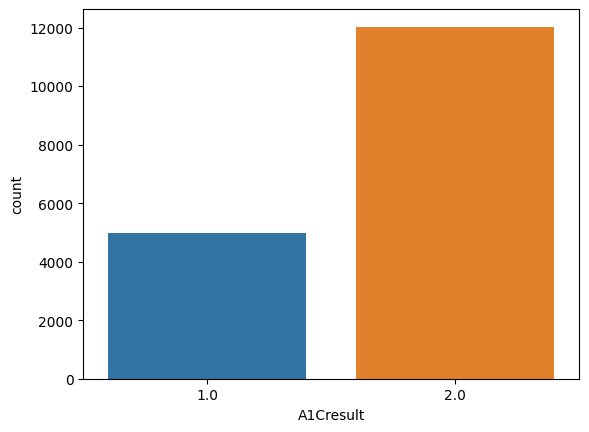

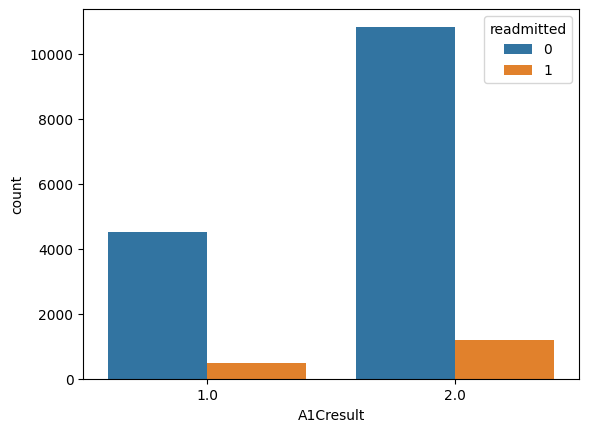

A1Cresult
2.0    12028
1.0     4990
Name: count, dtype: int64


In [293]:
diabet["A1Cresult"] = diabet["A1Cresult"].replace({">7":2,
                                           ">8":2,
                                           "Norm":1,
                                           "None":0})

sns.countplot(x = "A1Cresult", data = diabet)
plt.show()

sns.countplot(x = "A1Cresult",hue = "readmitted", data = diabet)
plt.show()

print(diabet.A1Cresult.value_counts())

## **Diabetes medications**

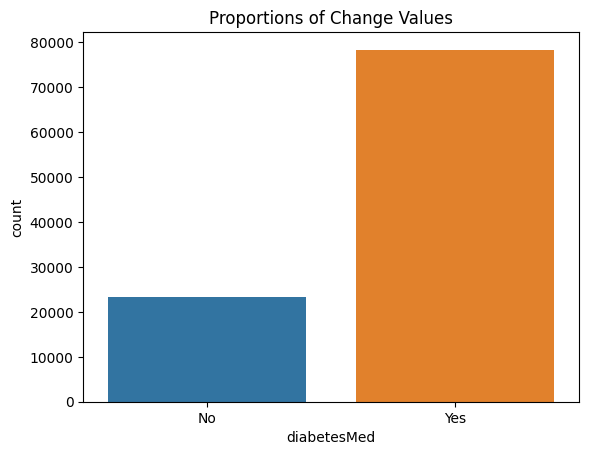

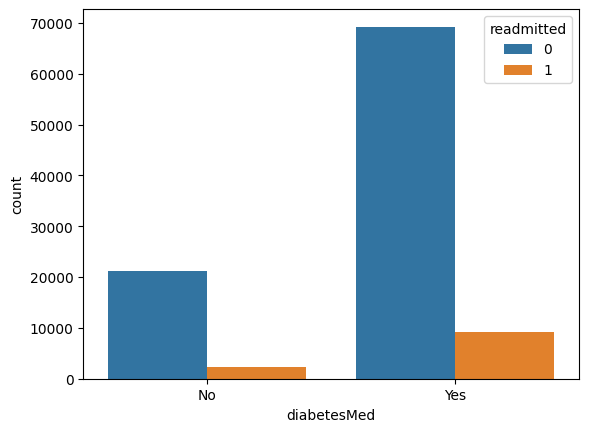

diabetesMed
Yes    78361
No     23402
Name: count, dtype: int64


In [294]:
sns.countplot(x = "diabetesMed", data = diabet )
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "diabetesMed", hue = "readmitted", data = diabet)
plt.show()

print(diabet.diabetesMed.value_counts())

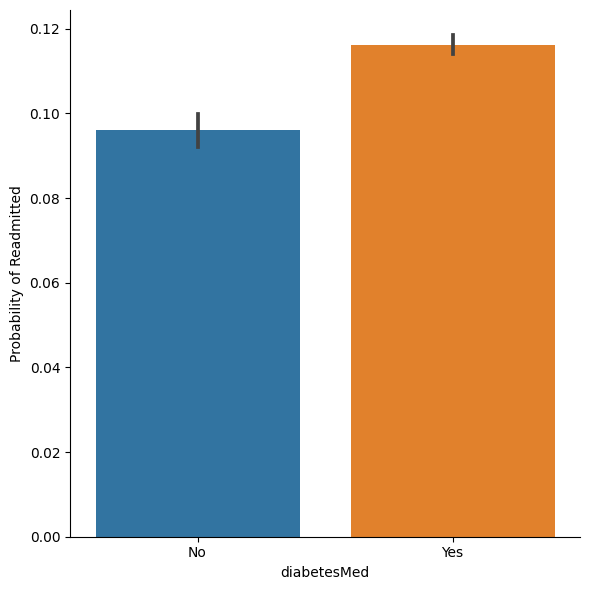

In [295]:
g = sns.catplot(x = "diabetesMed", y="readmitted", 
            data = diabet, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

In [296]:
diabet.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2271
gender                          0
age                             0
admission_type_id           10396
discharge_disposition_id     4680
admission_source_id          6942
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96417
A1Cresult                   84745
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [297]:
 diabet['race'] = diabet['race'].fillna(diabet['race'].mode()[0])

In [298]:
diabet['admission_type_id'] = diabet['admission_type_id'].fillna(diabet['admission_type_id'].mode()[0])

In [299]:
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].fillna(diabet['discharge_disposition_id'].mode()[0])

In [300]:
diabet['admission_source_id'] = diabet['admission_source_id'].fillna(diabet['admission_source_id'].mode()[0])

In [301]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Yes,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Yes,Yes,0


# Dropping duplicate values


In [302]:
cat_data = diabet.select_dtypes('O')

num_data = diabet.select_dtypes(np.number)

cat_data

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,metformin,repaglinide,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,Emergency,Discharged to Home,Referral,Diabetes,Other,Other,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,Emergency,Discharged to Home,Emergency,Other,Diabetes,Other,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes
2,AfricanAmerican,Female,Emergency,Discharged to Home,Emergency,Other,Diabetes,Other,No,No,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,Emergency,Discharged to Home,Emergency,Other,Diabetes,Circulatory,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes
4,Caucasian,Male,Emergency,Discharged to Home,Emergency,Neoplasms,Neoplasms,Diabetes,No,No,...,No,No,Steady,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Emergency,Other,Emergency,Diabetes,Other,Circulatory,Steady,No,...,No,No,Down,No,No,No,No,No,Yes,Yes
101762,AfricanAmerican,Female,Emergency,Other,Other,Digestive,Other,Digestive,No,No,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,Emergency,Discharged to Home,Emergency,Other,Genitourinary,Other,Steady,No,...,No,No,Down,No,No,No,No,No,Yes,Yes
101764,Caucasian,Female,Emergency,Other,Emergency,Injury,Other,Injury,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes


In [303]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])

In [304]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392,8222157,5,1,41,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,149190,55629189,15,3,59,0,18,0,0,0,...,0,0,3,1,0,0,0,0,1,1
2,64410,86047875,25,2,11,5,13,2,0,1,...,0,0,1,1,0,0,0,0,0,1
3,500364,82442376,35,2,44,1,16,0,0,0,...,0,0,3,1,0,0,0,0,1,1
4,16680,42519267,45,1,51,0,8,0,0,0,...,0,0,2,1,0,0,0,0,1,1


In [305]:
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)
data1 = data.dropna()

In [306]:
data1.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
162,85,5,47,1,6,0,0,0,5,2.0,...,0,0,1,1,0,0,0,0,0,0
192,45,2,53,0,4,0,0,0,2,2.0,...,0,0,1,1,0,0,0,0,0,0
460,75,10,72,1,19,0,0,0,5,2.0,...,0,0,3,1,0,0,0,0,1,1
593,55,2,61,0,5,0,0,0,5,2.0,...,0,0,2,1,0,0,0,0,0,1
696,75,11,71,1,20,0,0,0,5,2.0,...,0,0,1,1,0,0,0,0,0,1


# Splitting dependent and independent variables

In [307]:
X = data1.drop('readmitted',axis=1)

y = data1['readmitted']

# Splitting into train and test

In [308]:
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 

In [309]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [310]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [311]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((268, 44), (30, 44), (268,), (30,))

In [312]:
LR = LogisticRegression()

LR.fit(X_train_scaled,y_train)

LogisticRegression()

In [313]:
LR.score(X_train_scaled,y_train)


0.8805970149253731

In [314]:
LR.score(X_test_scaled,y_test)

0.9333333333333333

In [315]:
RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [316]:
RF.score(X_train_scaled,y_train)

0.996268656716418

In [317]:
RF.score(X_test_scaled,y_test)

0.9

In [318]:
y_pred = RF.predict(X_test)

In [319]:
confusion_matrix(y_test,y_pred)

array([[27,  0],
       [ 3,  0]])

In [320]:
accuracy_score(y_test,y_pred)

0.9

<Axes: >

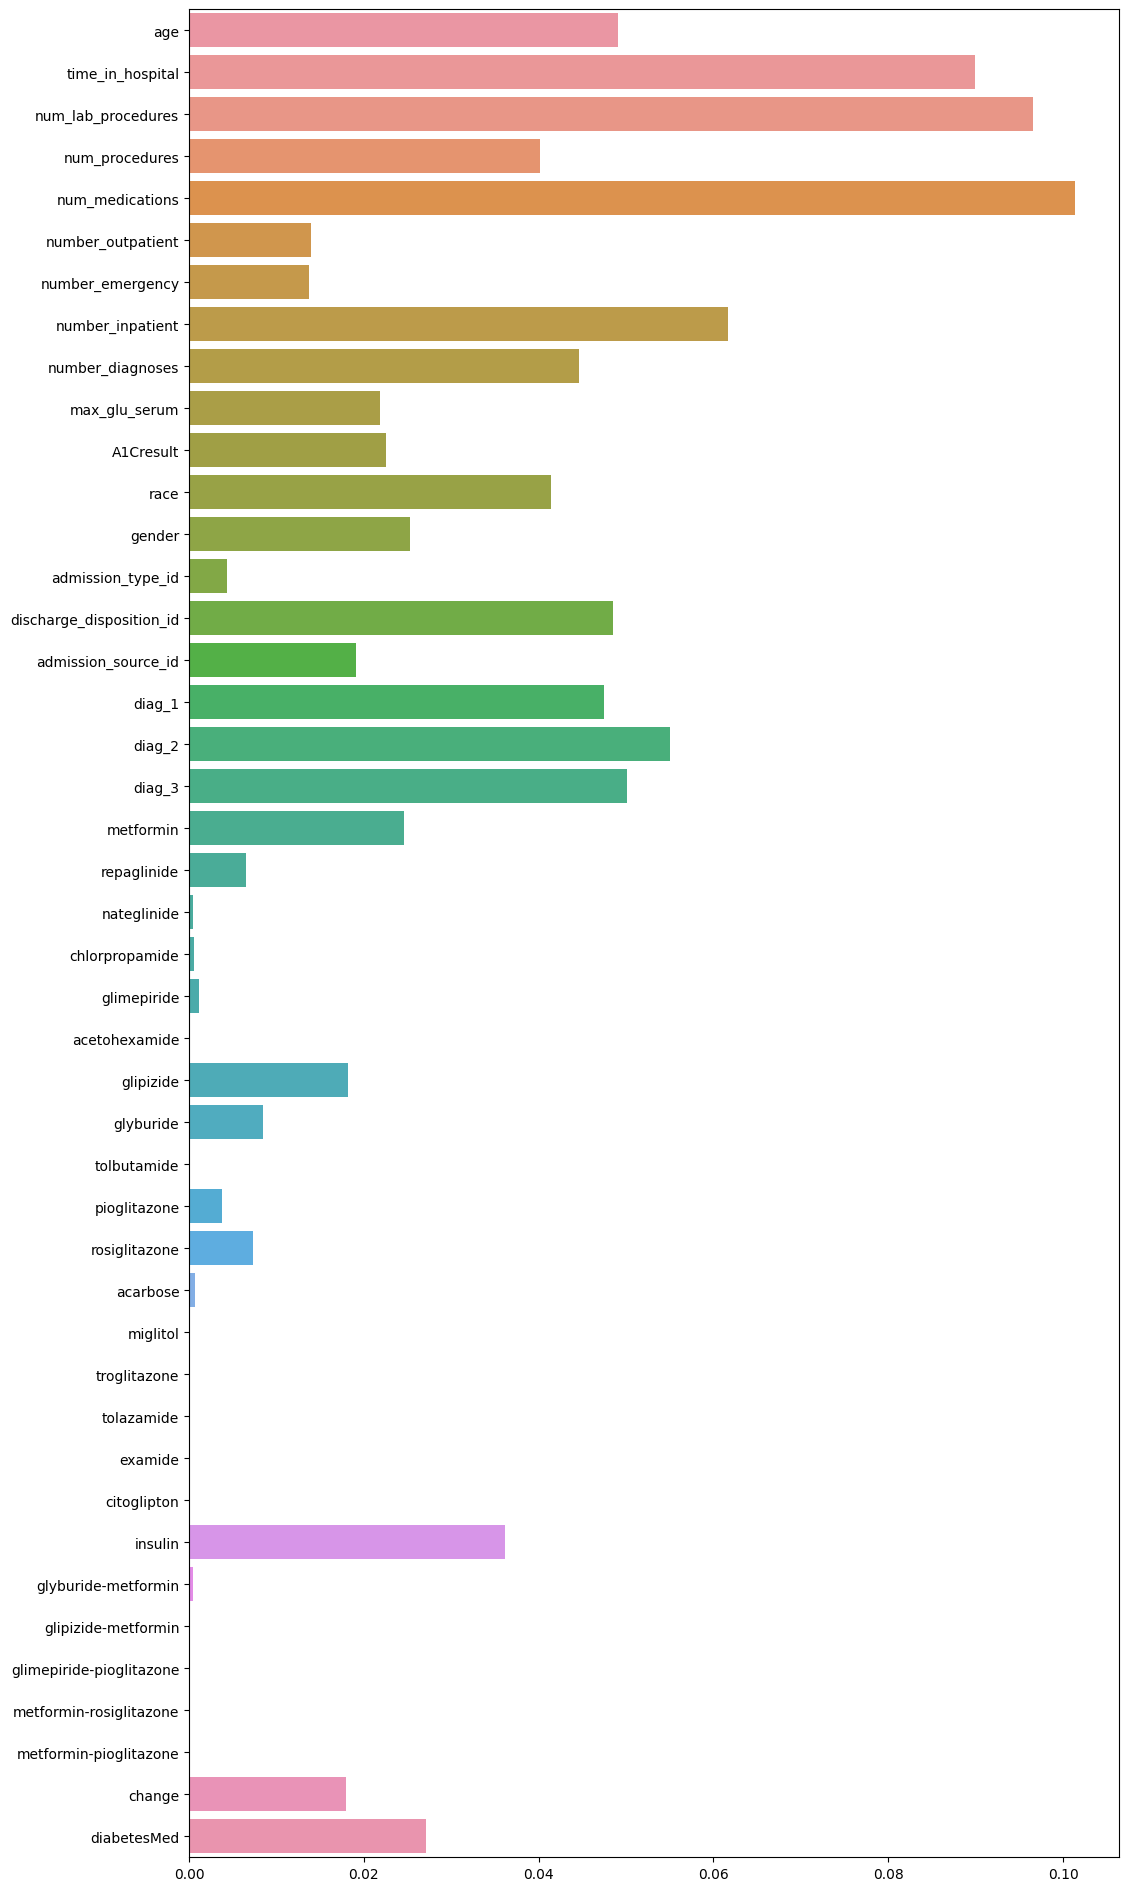

In [321]:
plt.figure(figsize=(12,24))
sns.barplot(x=RF.feature_importances_,y=X_train.columns)

In [322]:
z = pd.DataFrame([RF.feature_importances_,X_train.columns]).T

<Axes: xlabel='importance', ylabel='Feature'>

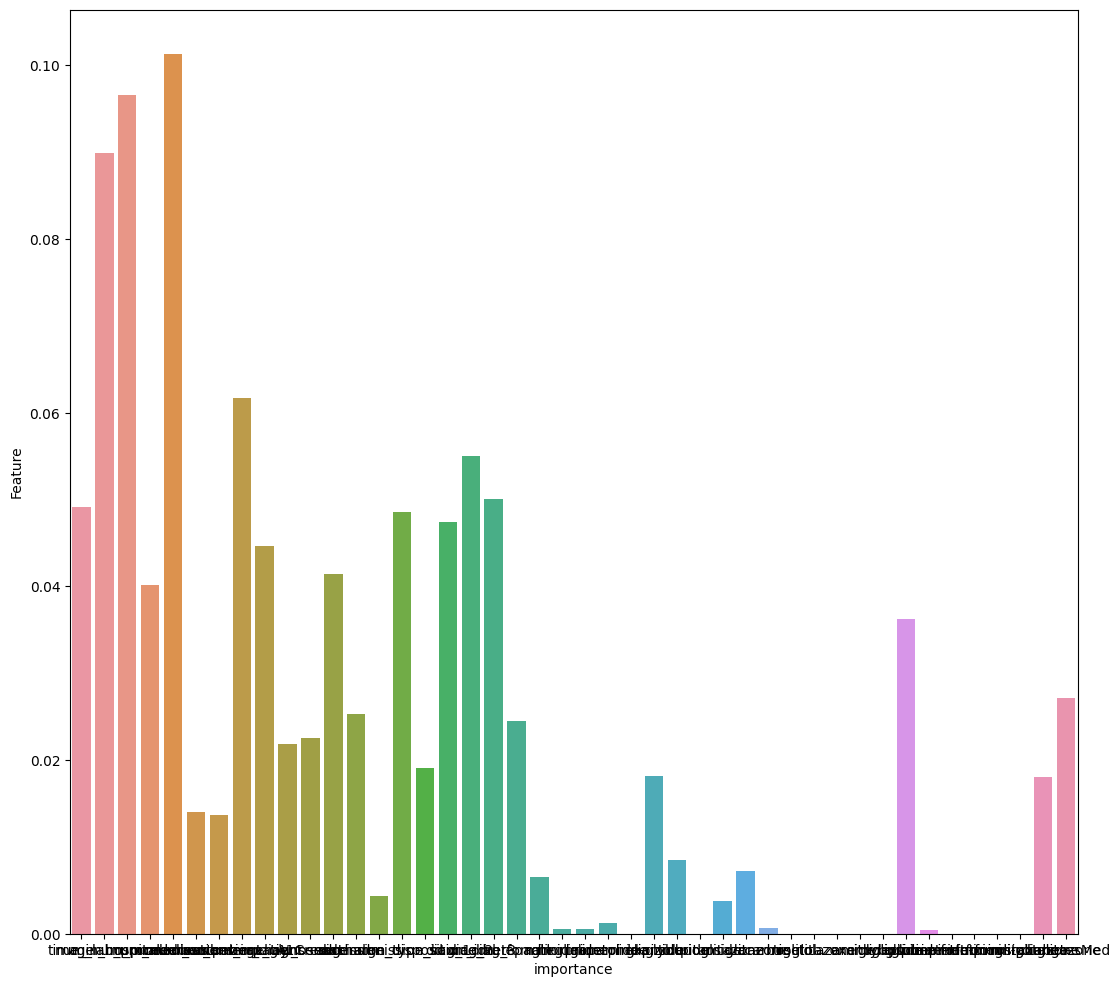

In [323]:
z.columns = ['Feature','importance']
plt.figure(figsize=(13,12))

sns.barplot(y=z['Feature'],x=z['importance'])

In [324]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Yes,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Yes,Yes,0


In [325]:
X.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
162,85,5,47,1,6,0,0,0,5,2.0,...,0,0,1,1,0,0,0,0,0,0
192,45,2,53,0,4,0,0,0,2,2.0,...,0,0,1,1,0,0,0,0,0,0
460,75,10,72,1,19,0,0,0,5,2.0,...,0,0,3,1,0,0,0,0,1,1
593,55,2,61,0,5,0,0,0,5,2.0,...,0,0,2,1,0,0,0,0,0,1
696,75,11,71,1,20,0,0,0,5,2.0,...,0,0,1,1,0,0,0,0,0,1


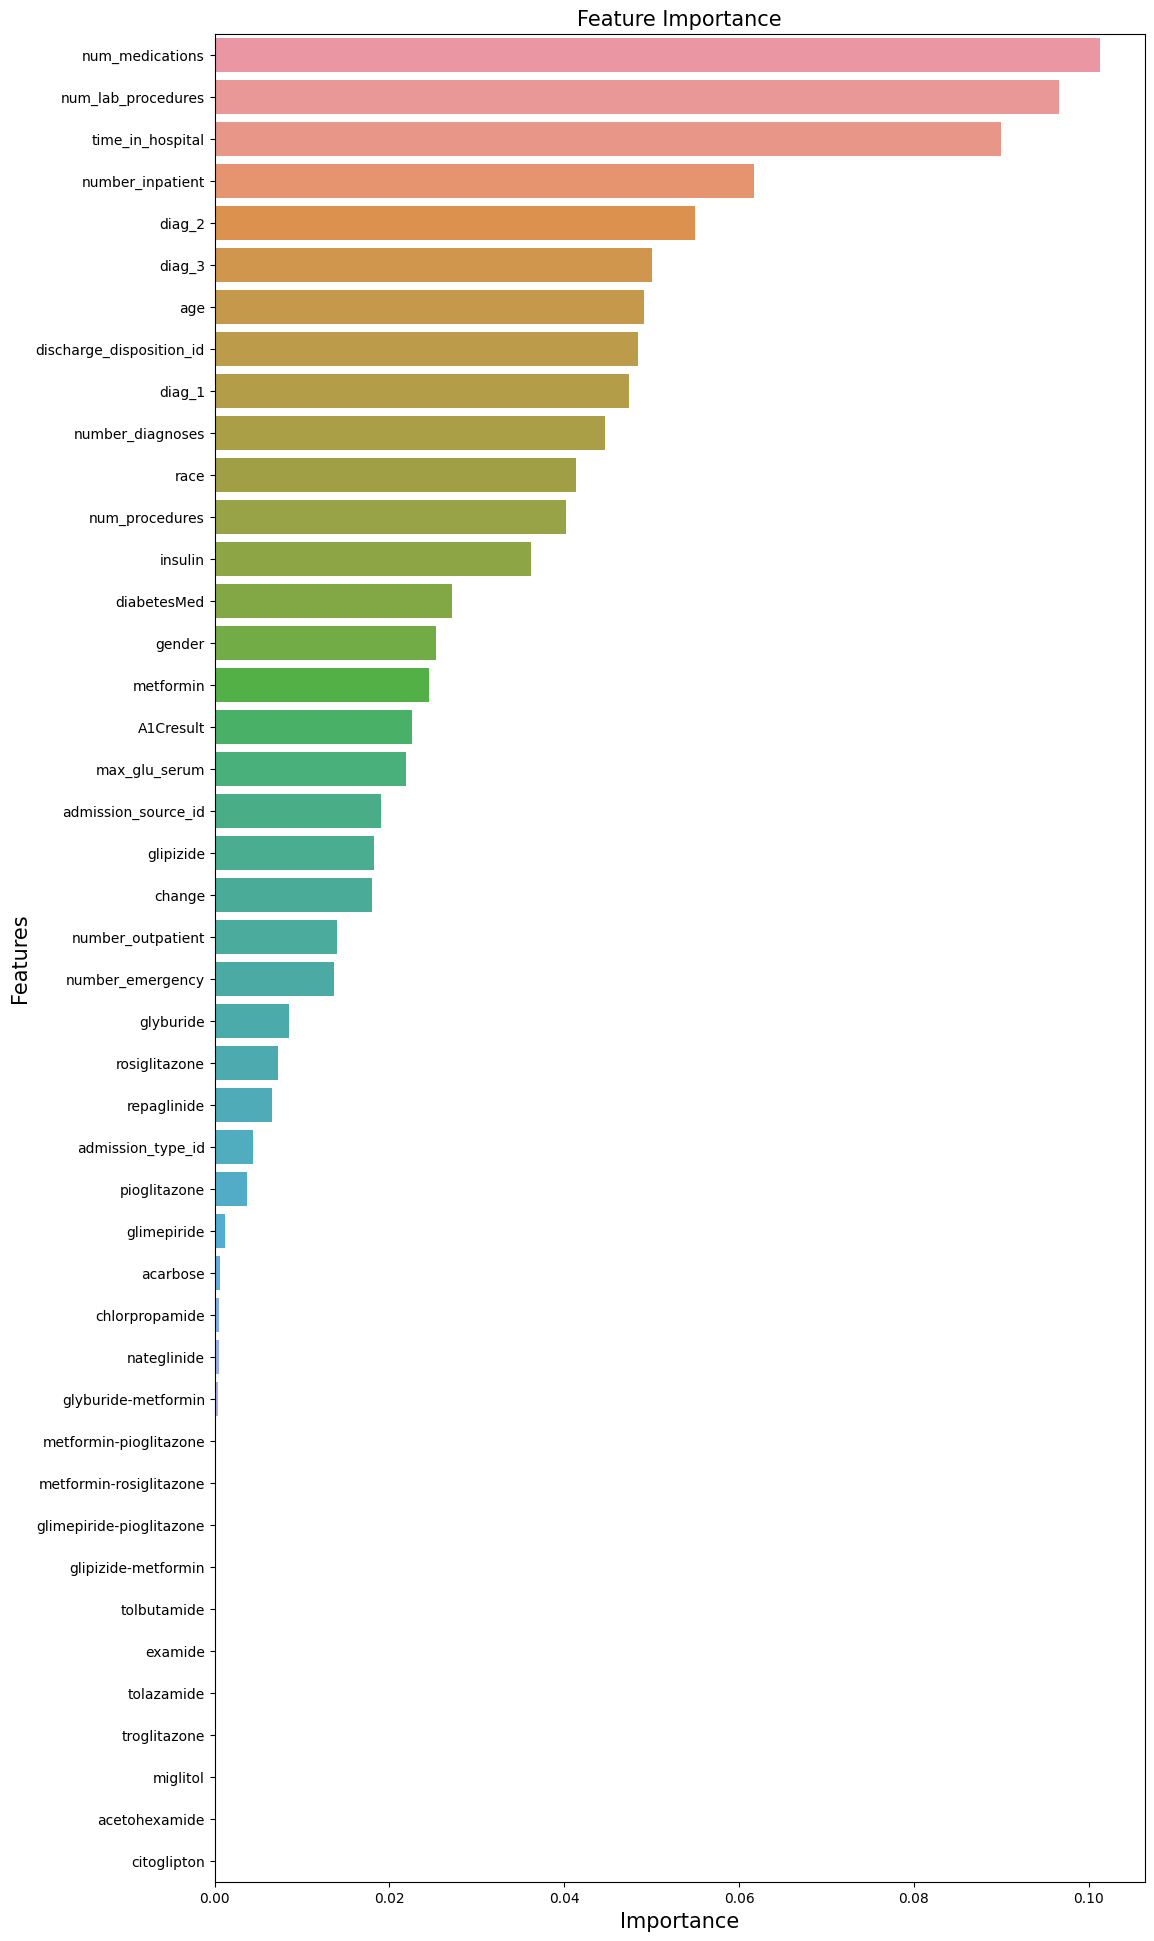

In [326]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': RF.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
plt.figure(figsize=(12,24))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [327]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)


    # display the plot
    plt.show()
  

In [331]:
#Oversampling method
import imblearn

from imblearn.over_sampling import SMOTE


In [332]:
oversample = SMOTE()

X,y = oversample.fit_resample(X,y)

In [333]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [334]:
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

RandomForestClassifier()

In [335]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(1.0, 0.9622641509433962)